In [1]:
import db_logger
import matplotlib.pyplot as plt
import glob, pathlib
import ipywidgets as widgets
import numpy as np
%load_ext autoreload
%autoreload 2

%matplotlib widget

In [22]:

logger =  db_logger.DB_Logger("/mnt/data/arty/data/gan_sampling/baseline.db", connect_only=True)
name2id = {}
for id in logger.get_experiment_ids():
    name = logger.get_experiment_name(id)
    name2id[name] = id
    print(name) 
    # if "OrganCMNIST" in name and "aug_True" in name:
    #     logger.remove_experiment(id)

Connecting to existing database at /mnt/data/arty/data/gan_sampling/baseline.db
OrganCMNIST_rlvl1_bTrue_aug_True
OrganCMNIST_rlvl1_bFalse_aug_True
OrganCMNIST_rlvl2_bTrue_aug_True
OrganCMNIST_rlvl2_bFalse_aug_True
OrganCMNIST_rlvl3_bTrue_aug_True
OrganCMNIST_rlvl3_bFalse_aug_True
OrganCMNIST_rlvl0_bTrue_aug_True
OrganCMNIST_rlvl0_bFalse_aug_True
OrganCMNIST_rlvl1_bTrue_aug_False
OrganCMNIST_rlvl1_bFalse_aug_False
OrganCMNIST_rlvl2_bTrue_aug_False
OrganCMNIST_rlvl2_bFalse_aug_False
OrganCMNIST_rlvl3_bTrue_aug_False
OrganCMNIST_rlvl3_bFalse_aug_False
OrganCMNIST_rlvl0_bTrue_aug_False
OrganCMNIST_rlvl0_bFalse_aug_False
BloodMNIST_rlvl1_bTrue_aug_True
BloodMNIST_rlvl1_bFalse_aug_True
PathMNIST_rlvl1_bTrue_aug_True
PathMNIST_rlvl1_bFalse_aug_True
BloodMNIST_rlvl2_bTrue_aug_True


In [23]:
results = {}
from collections import defaultdict
# Your data (accuracy, std, rlvl, b, aug)
data = defaultdict(list)
for exp in logger.get_experiment_ids():
    imgs, means, stds, maxs, samples = logger.get_stats(exp)
    if len(means) == 0:
        continue
    max_mean_idx = means.index(max(means))
    max_mean = means[max_mean_idx]
    max_std = stds[max_mean_idx]
    at_img = imgs[max_mean_idx]
    samples = samples[max_mean_idx]
    name = logger.get_experiment_name(exp)
    results[f"{name:<35} at: {at_img//1000:>6}k, samples: {samples:<3}"] = max_mean
    name, rlvl, b,_, aug = name.split("_")
    b = eval(b[1:])
    aug = eval(aug)
    rlvl = int(rlvl[-1])

    data[name].append((max_mean.item(),max_std.item(), rlvl, b, aug))
    


In [24]:
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
filterfunc = lambda x: "O" in x[0] 
sorted_results = list(filter(filterfunc, sorted_results))
for k, v in sorted_results[:40]:
    print(f"{v:.4f} -> {k}")

0.8848 -> OrganCMNIST_rlvl0_bTrue_aug_False   at:    178k, samples: 1  
0.8725 -> OrganCMNIST_rlvl0_bFalse_aug_False  at:    110k, samples: 1  
0.8661 -> OrganCMNIST_rlvl1_bFalse_aug_False  at:    100k, samples: 1  
0.8446 -> OrganCMNIST_rlvl1_bTrue_aug_False   at:    132k, samples: 1  
0.8039 -> OrganCMNIST_rlvl2_bFalse_aug_False  at:     60k, samples: 1  
0.8008 -> OrganCMNIST_rlvl3_bFalse_aug_False  at:    155k, samples: 1  
0.7427 -> OrganCMNIST_rlvl3_bTrue_aug_False   at:    155k, samples: 1  
0.7387 -> OrganCMNIST_rlvl0_bTrue_aug_True    at:    155k, samples: 1  
0.7328 -> OrganCMNIST_rlvl2_bTrue_aug_False   at:     10k, samples: 4  
0.7294 -> OrganCMNIST_rlvl0_bFalse_aug_True   at:     80k, samples: 1  
0.7145 -> OrganCMNIST_rlvl1_bFalse_aug_True   at:    155k, samples: 2  
0.7094 -> OrganCMNIST_rlvl1_bTrue_aug_True    at:    201k, samples: 1  
0.6393 -> OrganCMNIST_rlvl3_bTrue_aug_True    at:    110k, samples: 1  
0.6323 -> OrganCMNIST_rlvl2_bTrue_aug_True    at:     90k, sampl

In [13]:
for d in data.items():
    print(d)

('OrganCMNIST', [(0.6070789897798569, 0.0, 1, True, True), (0.6495760448950302, 0.0, 1, False, True), (0.6172956810069217, 0.0, 2, True, True), (0.5341286658902834, 0.0, 2, False, True), (0.5709074749790845, 0.0, 3, True, True), (0.4401038968458763, 0.0, 3, False, True), (0.6639518437778261, 0.0, 0, True, True), (0.7012111224563625, 0.0, 0, False, True), (0.8079766448353536, 0.0, 1, True, False), (0.814196219749178, 0.0, 1, False, False), (0.7161359486477396, 0.0, 2, True, False), (0.8035260444850525, 0.0, 2, False, False), (0.7475493461499387, 0.0, 3, True, False), (0.6788631414635092, 0.0, 3, False, False), (0.8405753753751558, 0.0, 0, True, False), (0.8415299235728896, 0.0, 0, False, False)])


interactive(children=(Dropdown(description='exp1', options=('BloodMNIST_rlvl1_bFalse_aug_True', 'BloodMNIST_rl…

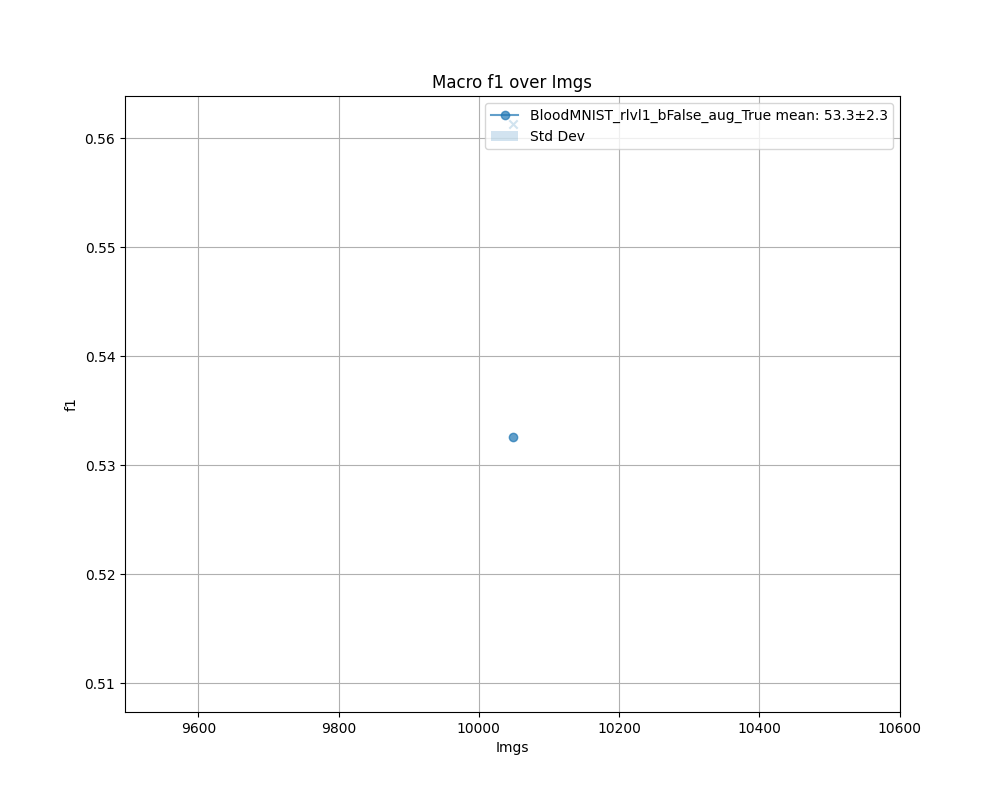

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
names = sorted([logger.get_experiment_name(x) for x in logger.get_experiment_ids()],)
@widgets.interact(
        exp1=names, 
        exp2=["none"]+names, 
        exp3=["none"]+names,
        exp4=["none"]+names,
        exp5=["none"]+names,
        metric=["f1", "acc", "precision", "recall"])
def display_content(exp1, exp2, exp3, exp4, exp5, metric):
    name2id = {}
    for id in logger.get_experiment_ids():
        name2id[logger.get_experiment_name(id)] = id
    print(f"Working ...", end="")
    ax.clear()
    db_logger.plot_metric(logger, [name2id[exp1]], metric=metric, ax=ax, prefix='')
    if exp2 != "none":
        db_logger.plot_metric(logger, [name2id[exp2]], metric=metric, ax=ax, prefix='')
    if exp3 != "none":
        db_logger.plot_metric(logger, [name2id[exp3]], metric=metric, ax=ax, prefix='')
    if exp4 != "none":
        db_logger.plot_metric(logger, [name2id[exp4]], metric=metric, ax=ax, prefix='')
    if exp5 != "none":
        db_logger.plot_metric(logger, [name2id[exp5]], metric=metric, ax=ax, prefix='')
    print(f"\rDone       ")

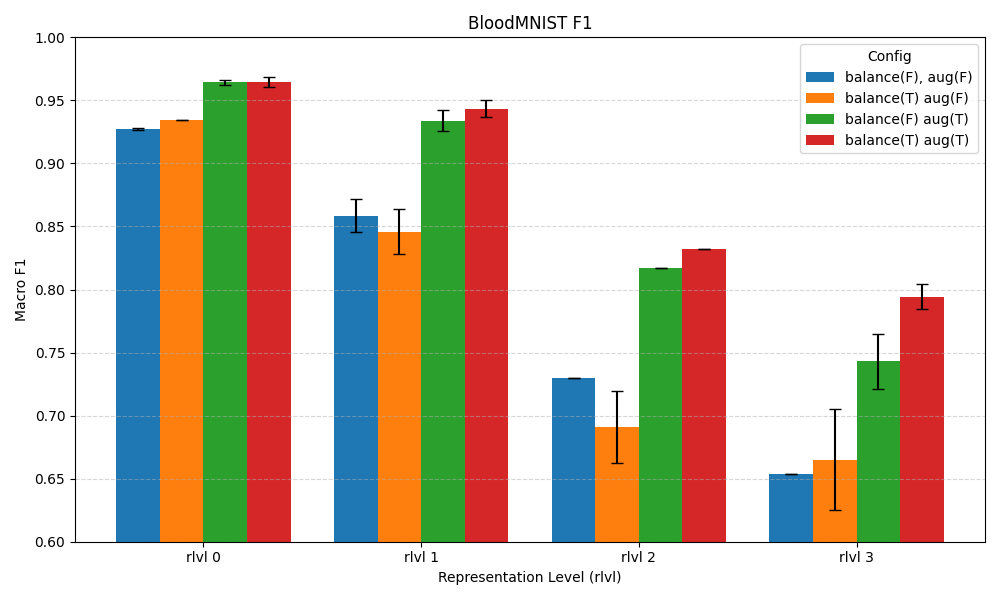

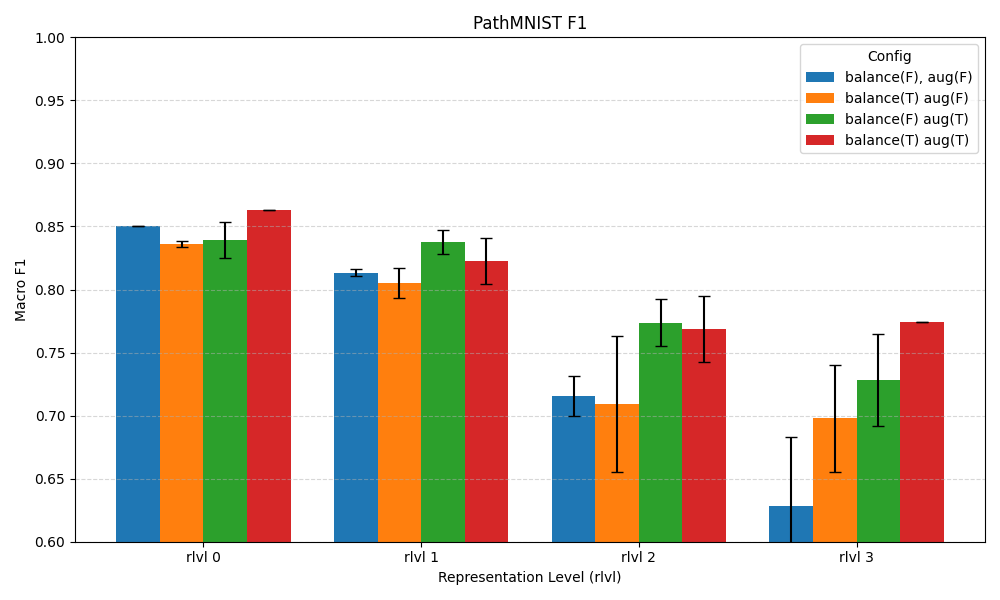

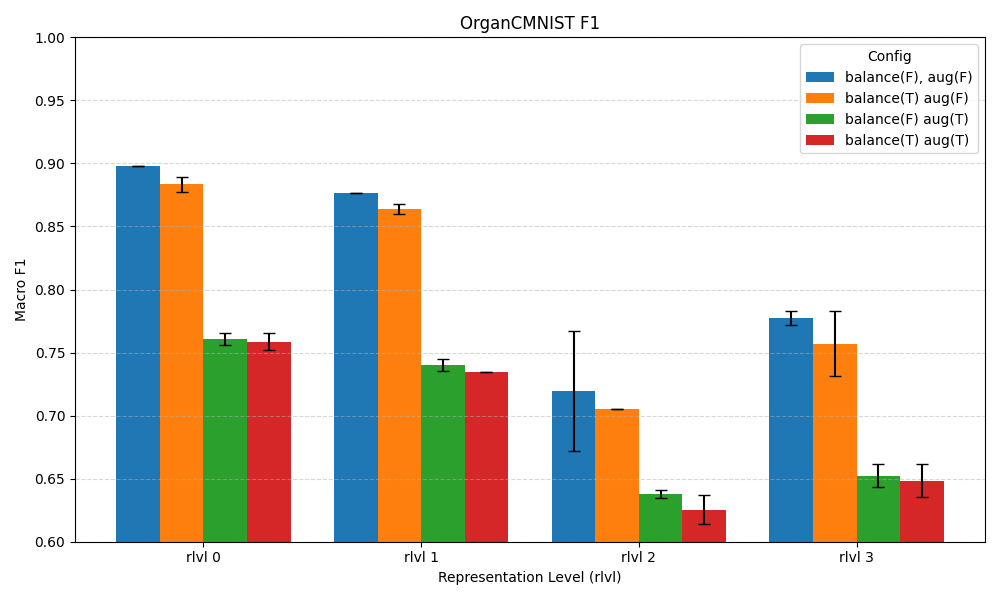

In [19]:
config_labels = {
    (False, False): "balance(F), aug(F)",
    (True,  False): "balance(T) aug(F)",
    (False, True):  "balance(F) aug(T)",
    (True,  True):  "balance(T) aug(T)",
}

# Organize data
means_by_group = {rlvl: {cfg: None for cfg in config_labels} for rlvl in range(4)}
stds_by_group = {rlvl: {cfg: 0.0 for cfg in config_labels} for rlvl in range(4)}
# Mapping config combinations to label
for name, d in data.items():

    for acc, std, rlvl, b, aug in d:
        key = (b, aug)
        means_by_group[rlvl][key] = acc
        stds_by_group[rlvl][key] = std

    # Bar plot setup
    x = np.arange(4)  # rlvl 0,1,2,3
    width = 0.2

    fig, ax = plt.subplots(figsize=(10, 6))

    for i, config in enumerate(config_labels):
        means = [means_by_group[rlvl][config] for rlvl in x]
        stds = [stds_by_group[rlvl][config] for rlvl in x]
        offsets = x + (i - 1.5) * width
        ax.bar(offsets, means, width, yerr=stds, capsize=4, label=config_labels[config])

    # Aesthetics
    ax.set_ylabel('Macro F1')
    ax.set_xlabel('Representation Level (rlvl)')
    ax.set_title(f'{name} F1')
    ax.set_xticks(x)
    ax.set_xticklabels([f'rlvl {i}' for i in x])
    ax.set_ylim(0.6, 1.0)
    ax.legend(title="Config")
    ax.grid(axis='y', linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.savefig(f"{name}_bar.png")